<a href="https://colab.research.google.com/github/Tugume/OOP-Assignment/blob/main/Final_OOP_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


In [5]:
import pandas as pd
# Read the uploaded CSV file
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

# Show the first 5 rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
# Keep only the columns we need (Date and Sales)
df = df[['ORDERDATE', 'SALES']]

# Convert the 'ORDERDATE' column to datetime format (e.g., 2/24/2003 → 2003-02-24)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Group sales by date (add sales from same date)
df = df.groupby('ORDERDATE').sum()

# Sort by date (from oldest to newest)
df = df.sort_index()

# View the first few rows
print(df.head())

               SALES
ORDERDATE           
2003-01-06  12133.25
2003-01-09  11432.34
2003-01-10   6864.05
2003-01-29  54702.00
2003-01-31  44621.96


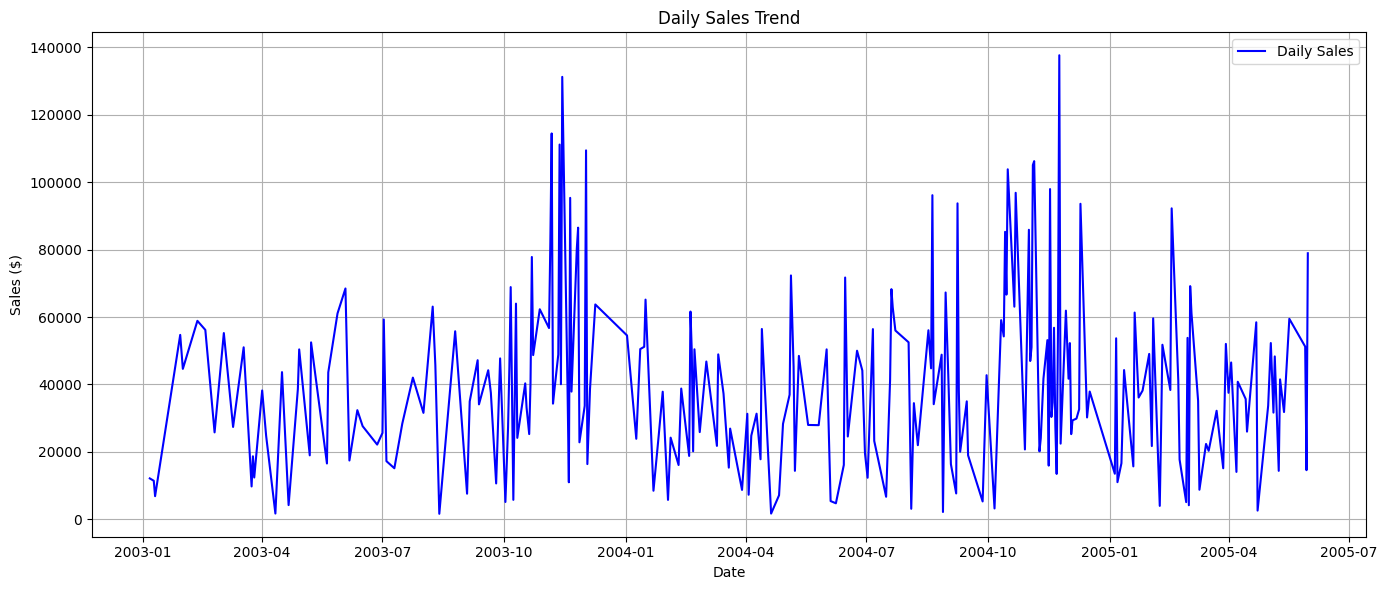

In [7]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt
# Set the figure size (width=14, height=6) so the graph is large and clear
plt.figure(figsize=(14, 6))

# Plot sales over time; x = date, y = sales values
plt.plot(df.index, df['SALES'], color='blue', label='Daily Sales')

# Set a title for the chart
plt.title('Daily Sales Trend')

# Label for the X-axis
plt.xlabel('Date')

# Label for the Y-axis
plt.ylabel('Sales ($)')

# Add grid lines for better readability
plt.grid(True)

# Show the legend (Daily Sales label)
plt.legend()

# Adjust layout so nothing gets cut off
plt.tight_layout()

# Finally, display the plot
plt.show()

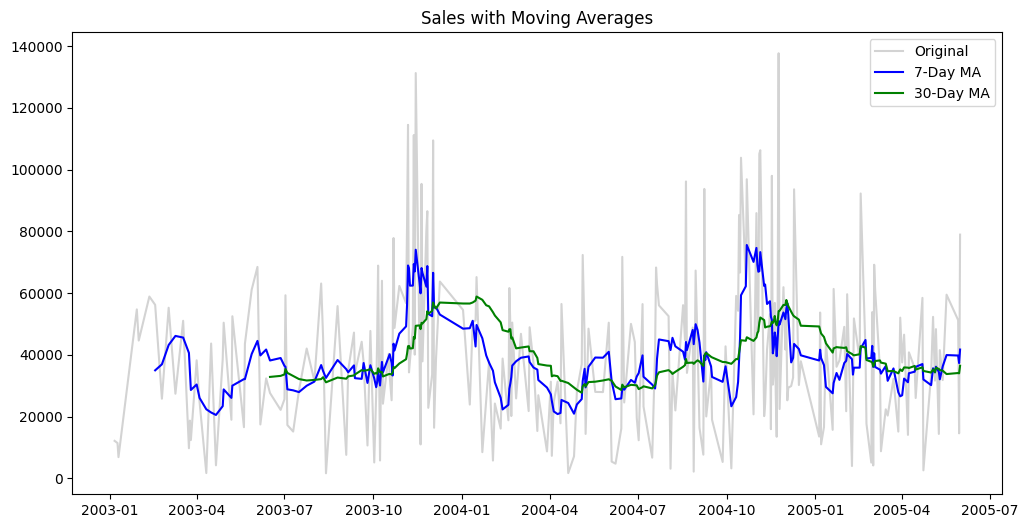

In [8]:
# Add 7-day moving average (rolling mean)
df['7-day MA'] = df['SALES'].rolling(window=7).mean()

# Add 30-day moving average
df['30-day MA'] = df['SALES'].rolling(window=30).mean()

# Create a new plot
plt.figure(figsize=(12, 6))

# Plot original daily sales
plt.plot(df['SALES'], label='Original', color='lightgray')

# Plot 7-day moving average
plt.plot(df['7-day MA'], label='7-Day MA', color='blue')

# Plot 30-day moving average
plt.plot(df['30-day MA'], label='30-Day MA', color='green')

# Add a title and legend
plt.title('Sales with Moving Averages')
plt.legend()

# Show the chart
plt.show()

/tmp/ipython-input-2456348983.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['SALES'].resample('M').sum()


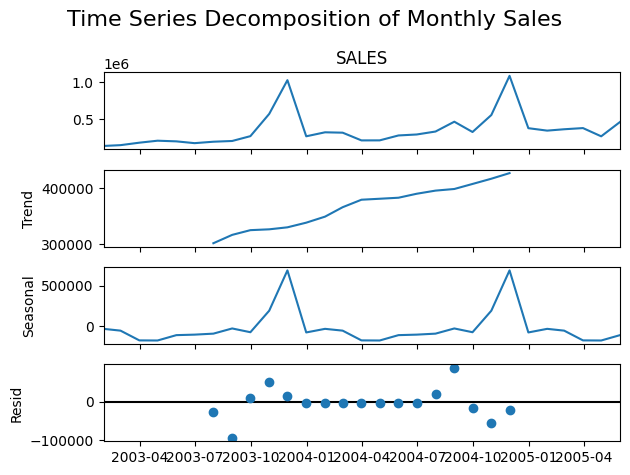

In [9]:
# Import the seasonal decomposition function
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 11: Convert daily sales to monthly total sales
monthly_sales = df['SALES'].resample('M').sum()

# Step 12: Break the monthly sales data into trend, seasonality, and noise
result = seasonal_decompose(monthly_sales, model='additive')

# Step 13: Plot the result
result.plot()  # Creates 4 subplots: observed, trend, seasonal, residual
plt.suptitle('Time Series Decomposition of Monthly Sales', fontsize=16)  # Add title
plt.tight_layout()  # Prevents label cutoff
plt.show()  # Show the chart

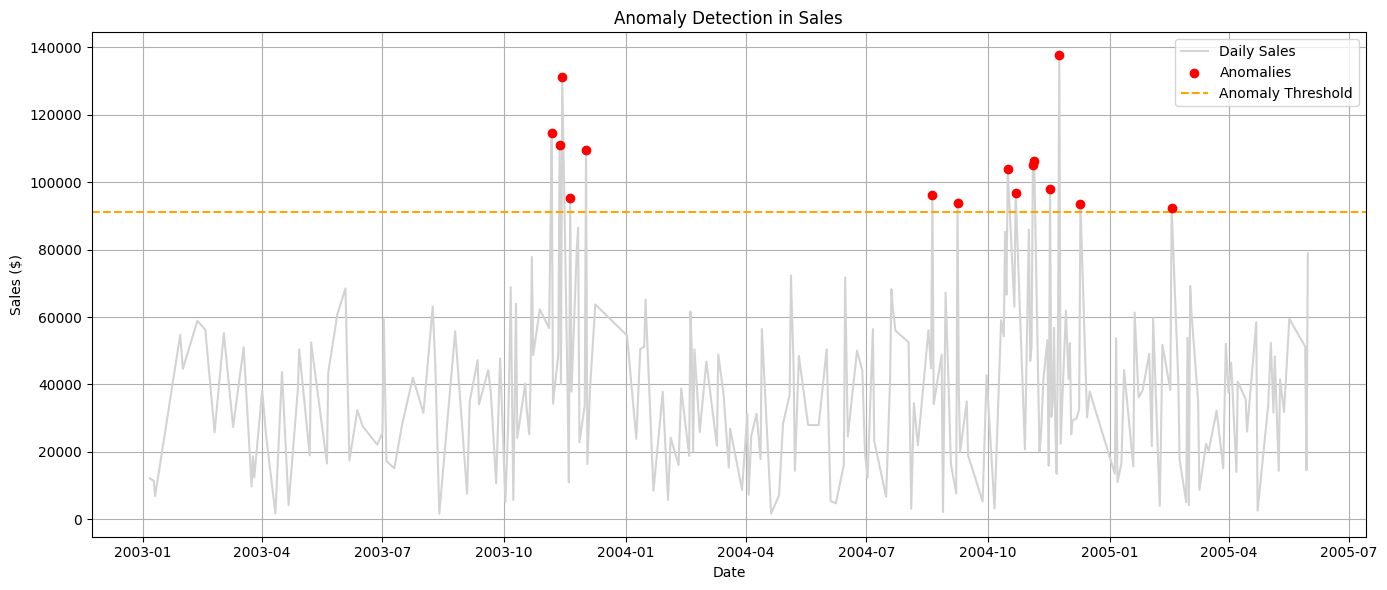

Unusual Sales Days:
                SALES
ORDERDATE            
2003-11-06  114456.85
2003-11-12  111156.73
2003-11-14  131236.00
2003-11-20   95344.63
2003-12-02  109432.27
2004-08-20   96139.50
2004-09-08   93717.43
2004-10-16  103815.53
2004-10-22   96850.65
2004-11-04  105074.98
2004-11-05  106240.69
2004-11-17   97958.38
2004-11-24  137644.72
2004-12-10   93587.56
2005-02-17   92236.97


In [10]:
# Calculate threshold for anomaly detection
mean_sales = df['SALES'].mean()  # Average sales
std_sales = df['SALES'].std()    # Spread/variation in sales
threshold = mean_sales + 2 * std_sales  # Set threshold at 2 standard deviations above mean

# Identify days where sales exceed this threshold
anomalies = df[df['SALES'] > threshold]  # These are the anomaly days

# Visualize daily sales and mark anomalies
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['SALES'], label='Daily Sales', color='lightgray')  # Main sales line
plt.scatter(anomalies.index, anomalies['SALES'], color='red', label='Anomalies', zorder=5)  # Red dots for anomalies

# Add horizontal line for the anomaly threshold
plt.axhline(y=threshold, color='orange', linestyle='--', label='Anomaly Threshold')

plt.title('Anomaly Detection in Sales')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Display the dates and values of anomalies
print("Unusual Sales Days:")
print(anomalies[['SALES']])

In [12]:
!pip install prophet

In [15]:
!pip uninstall prophet

Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/prophet-1.1.7.dist-info/*
    /usr/local/lib/python3.12/dist-packages/prophet.libs/libtbb-ff323302.so.2
    /usr/local/lib/python3.12/dist-packages/prophet.libs/libtbbmalloc-4dcb68e3.so.2
    /usr/local/lib/python3.12/dist-packages/prophet/*
Proceed (Y/n)? y
  Successfully uninstalled prophet-1.1.7


In [17]:
!pip uninstall pystan

In [1]:
!pip install prophet

In [13]:
# Import Prophet
from prophet import Prophet

# Prepare monthly data (we'll forecast based on monthly sales totals)
monthly_df = df['SALES'].resample('M').sum().reset_index()

# Prophet expects columns named 'ds' for date and 'y' for value
monthly_df.columns = ['ds', 'y']

# Let's see the first few rows
monthly_df.head()

/tmp/ipython-input-4255917292.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['SALES'].resample('M').sum().reset_index()


,ds,y
0,2003-01-31,129753.60
1,2003-02-28,140836.19
2,2003-03-31,174504.90
3,2003-04-30,201609.55
4,2003-05-31,192673.11


In [14]:
# Create and fit the model
model = Prophet()               # Initialize Prophet model
model.fit(monthly_df)           # Fit the model to our sales data

# Create future dates (12 more months from the last date in the dataset)
future = model.make_future_dataframe(periods=12, freq='M')  # Add 12 future months

# Predict future sales using the trained model
forecast = model.predict(future)  # Generate forecast for all dates (past + future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


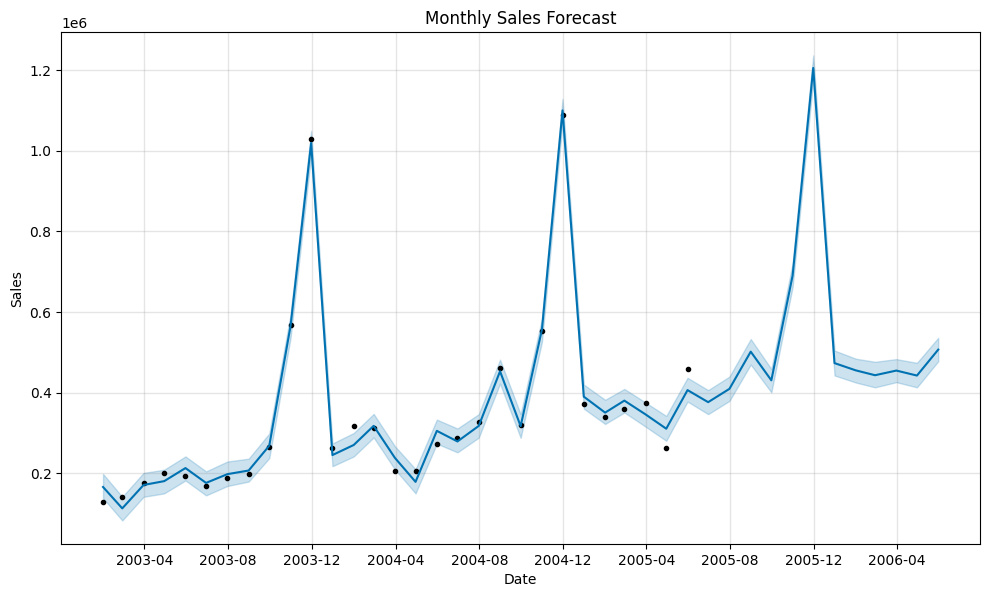

In [15]:
# Plot the forecast
fig = model.plot(forecast)          # Prophet's built-in forecast plot
plt.title("Monthly Sales Forecast") # Add title
plt.xlabel("Date")                  # X-axis label
plt.ylabel("Sales")                 # Y-axis label
plt.grid(True)                      # Add grid for clarity
plt.show()                          # Show the plot